In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
import dtreeviz
import graphviz
from matplotlib import pyplot as plt
import pandas as pd


ModuleNotFoundError: No module named 'dtreeviz'

In [56]:
def get_data():
    GSPREADHSEET_DOWNLOAD_URL = (
        "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
    )
    TP_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
    df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=TP_GID))
    return df   

In [57]:
def feature_engineering(df):
    # Missings en barrio
    data_set_mejorado = df.copy()
    data_set_mejorado['barrio'] = data_set_mejorado['barrio'].apply(lambda x: 'Palermo' if str(x) == 'nan' else x)

    # Missings en categoría de trabajo
    data_set_mejorado['categoria_de_trabajo'] = data_set_mejorado['categoria_de_trabajo'].apply(lambda x: 'Sin categoria' if str(x) == 'nan' else x)

    # Missings en trabajo
    data_set_mejorado['trabajo'] = data_set_mejorado['trabajo'].apply(lambda x: 'No responde' if str(x) == 'nan' else x)

    # Eliminación de el atributo eduación alcanzada
    del data_set_mejorado['educacion_alcanzada']

    # Juntamos casado y casada en una misma categoría.
    data_set_mejorado['rol_familiar_registrado'] = data_set_mejorado['rol_familiar_registrado'].apply(lambda x : 'casado' if x == 'casada' else x)
    
    # One hot encoding provisorio
    data_set_mejorado = pd.get_dummies(data_set_mejorado, drop_first=True)
    
    return data_set_mejorado

In [58]:
df = feature_engineering(get_data())
df.columns

Index(['anios_estudiados', 'edad',
       'ganancia_perdida_declarada_bolsa_argentina',
       'horas_trabajo_registradas', 'tiene_alto_valor_adquisitivo',
       'barrio_Almagro', 'barrio_Balvanera', 'barrio_Barracas',
       'barrio_Belgrano', 'barrio_Boedo', 'barrio_Caballito',
       'barrio_Chacarita', 'barrio_Cilla Riachuelo', 'barrio_Coghland',
       'barrio_Colegiales', 'barrio_Constitucion', 'barrio_Flores',
       'barrio_Floresta', 'barrio_La Boca', 'barrio_La Paternal',
       'barrio_Liniers', 'barrio_Mataderos', 'barrio_Monserrat',
       'barrio_Monte Castro', 'barrio_Nueva Pompeya', 'barrio_Palermo',
       'barrio_Parque Avellaneda', 'barrio_Parque Chacabuco',
       'barrio_Parque Chas', 'barrio_Puerto Madero', 'barrio_Recoleta',
       'barrio_Retiro', 'barrio_San Isidro', 'barrio_San Telmo',
       'barrio_Santa Rita', 'barrio_Velez Sarsfield', 'barrio_Versalles',
       'barrio_Villa Devoto', 'barrio_Villa General Mitre',
       'barrio_Villa Luro', 'barrio_Villa 

In [59]:
params = { 'max_depth': range(3,8), 'criterion': ('gini','entropy'), 'splitter':('best', 'random'), 'max_features':('sqrt', 'log2') }
model = DecisionTreeClassifier()

In [60]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('tiene_alto_valor_adquisitivo',1), df['tiene_alto_valor_adquisitivo'], random_state=112)

In [62]:
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

In [63]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

/home/nicolascontinanza/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass max_depth=       anios_estudiados  edad  ganancia_perdida_declarada_bolsa_argentina  \
11908                15    26                                           0   
19499                17    45                                           0   
15698                18    32                                           0   
2602                 15    45                                           0   
29320                14    29                                           0   
...                 ...   ...                                         ...   
18753                14    18                                           0   
7642                 13    62                                           0   
232                  14    25                                           0   
11179                13    20                                           0   
15972                14    18   

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

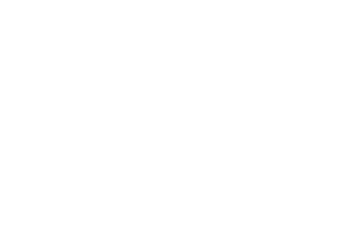

In [64]:
viz = dtreeviz.dtreeviz(
    clf,
    X,
    y,
    target_name='smoker',
    feature_names=list(X.columns),
    class_names=list(y_encoder.classes_),
    scale=1.5,
)

display(viz)

In [ ]:
score

In [ ]:
print(classification_report(y_test,gscv.predict(X_test)))

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

In [ ]:
plot_roc_curve(gscv, X_test, y_test)